In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!nvidia-smi

Sat Jun  8 18:36:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [20]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/ensemble-learning/kaggle.json ~/.kaggle/kaggle.json

In [21]:
#imprt Necessary  Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Import Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

import pickle as pkl
import seaborn as sns

## 1. Load Dataset

In [22]:
import kaggle
import os

dataset_name = 'noorsaeed/medicine-recommendation-system-dataset'

download_dir = '/content/drive/MyDrive/medical-diagnosis/data'

kaggle.api.dataset_download_files(dataset_name, path=download_dir, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/noorsaeed/medicine-recommendation-system-dataset


In [23]:
dataset = pd.read_csv('/content/drive/MyDrive/medical-diagnosis/data/Training.csv')

In [24]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [25]:
dataset.shape

(4920, 133)

## 2. Data Processing

In [26]:
dataset.isnull().sum()


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [27]:
dataset.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
dataset.prognosis.value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [29]:
len(dataset.prognosis.value_counts()) #total unique no. of desiese

41

In [30]:
labels = dataset.prognosis.unique()

In [31]:
len(labels)

41

In [32]:
X = dataset.drop('prognosis' , axis = 1)
y = dataset['prognosis']

In [33]:
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

In [34]:
Y

array([15, 15, 15, ..., 38, 35, 27])

In [35]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


## 3. Training Models

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,Y , test_size=0.2, random_state=42)

In [37]:
X_train.shape, X_test.shape

((3936, 132), (984, 132))

In [38]:
def training_model(name, model):
    print(f"============::training {name} model::==========")
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    accuracy  = accuracy_score(y_test, y_pred )
    print(f"{name} accuracy :{accuracy}\n")

    print(f"=============::confusion matrix for {name}::============")
    cm = confusion_matrix(y_test , y_pred)
    plt.figure(figsize = (15,15))
    sns.heatmap(cm, annot=True)
    plt.show()

    print(f"\n\n=============::classification report for {name}::============")
    report = classification_report(y_test , y_pred)
    print(report)

    pkl.dump(model , open(f'/content/drive/MyDrive/medical-diagnosis/models/{name}.pkl','wb') )

    return model

In [39]:
models = {
    'SVC': SVC(kernel = 'linear'),
    'Random_forest' : RandomForestClassifier(n_estimators= 100 , random_state=42),
    'Gradiant_Boosting': GradientBoostingClassifier(n_estimators=100 , random_state = 42),
    'MultiNomialNB' : MultinomialNB(),
    'Kneighbours': KNeighborsClassifier(n_neighbors= 5 )
}

============::training SVC model::==========
SVC accuracy :1.0

=============::confusion matrix for SVC::============


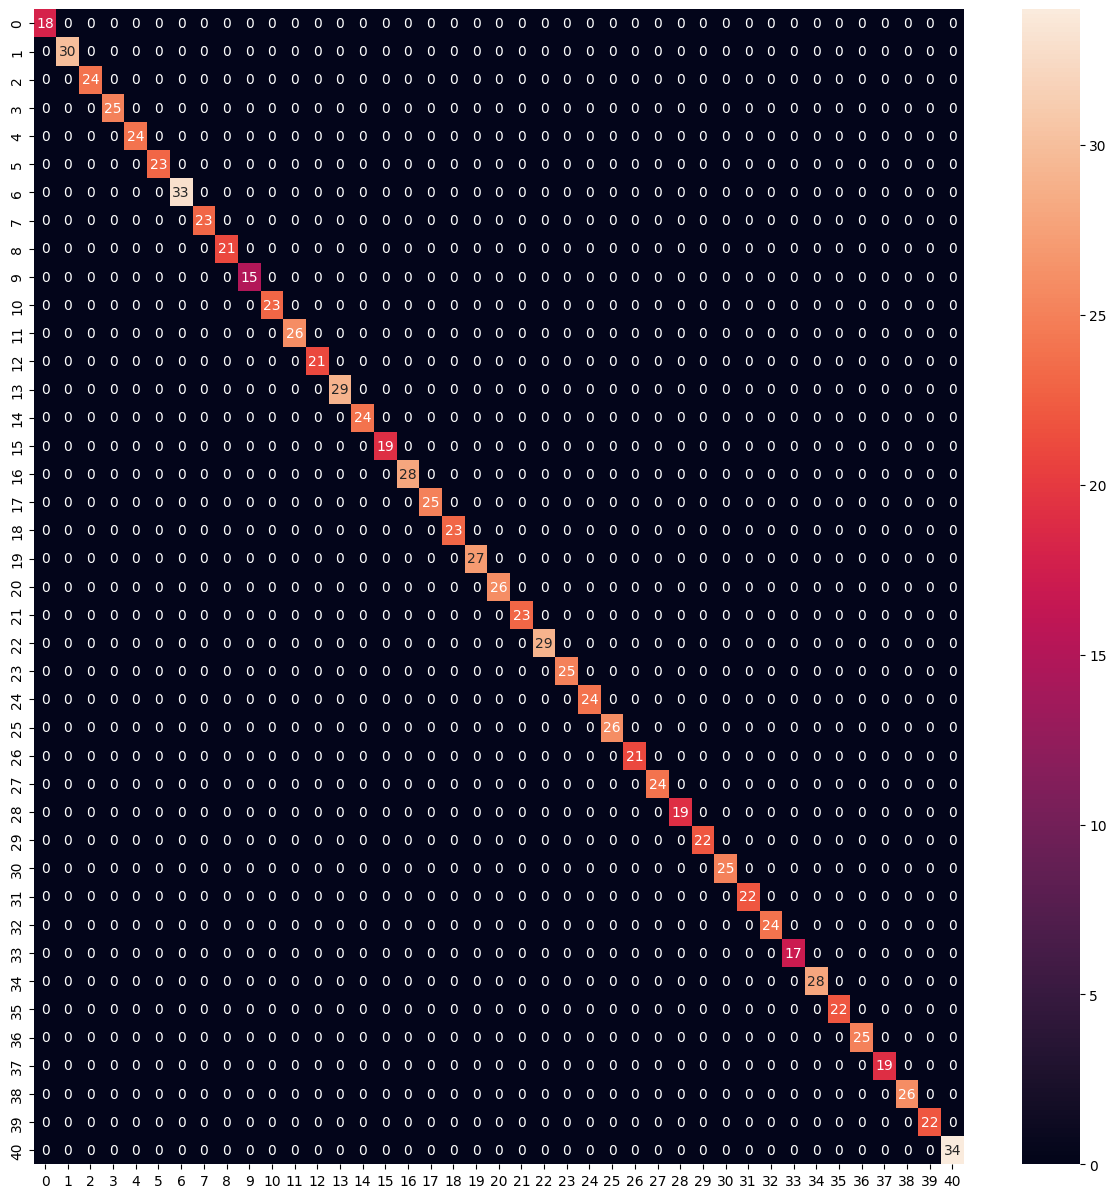



=============::classification report for SVC::============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1

In [40]:
svm = training_model('SVC', models['SVC'])

============::training Random_forest model::==========
Random_forest accuracy :1.0

=============::confusion matrix for Random_forest::============


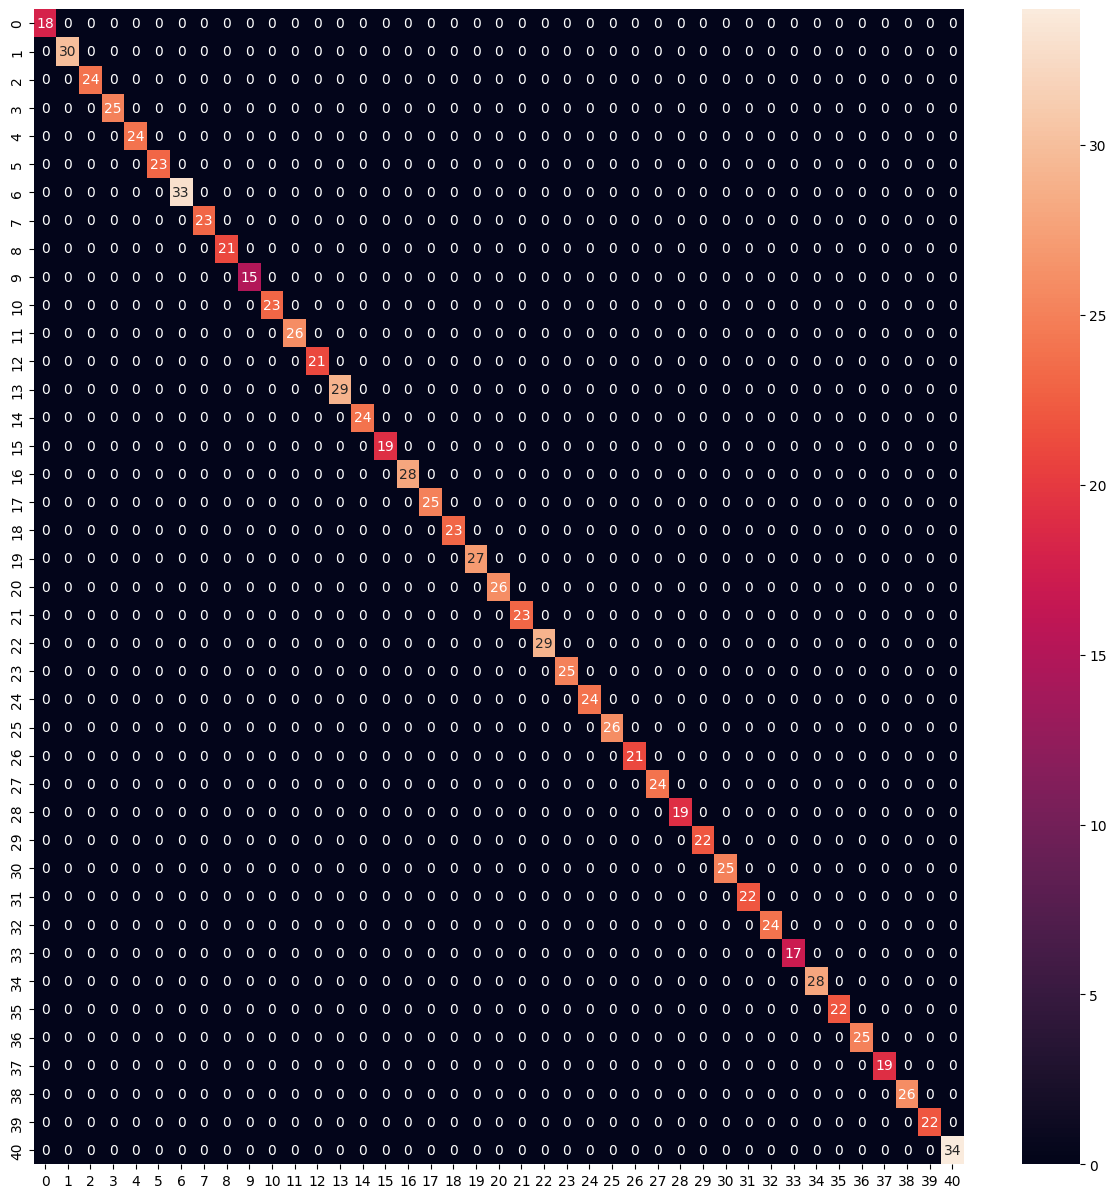



=============::classification report for Random_forest::============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          

In [41]:
rf = training_model('Random_forest', models['Random_forest'])

============::training Gradiant_Boosting model::==========
Gradiant_Boosting accuracy :1.0

=============::confusion matrix for Gradiant_Boosting::============


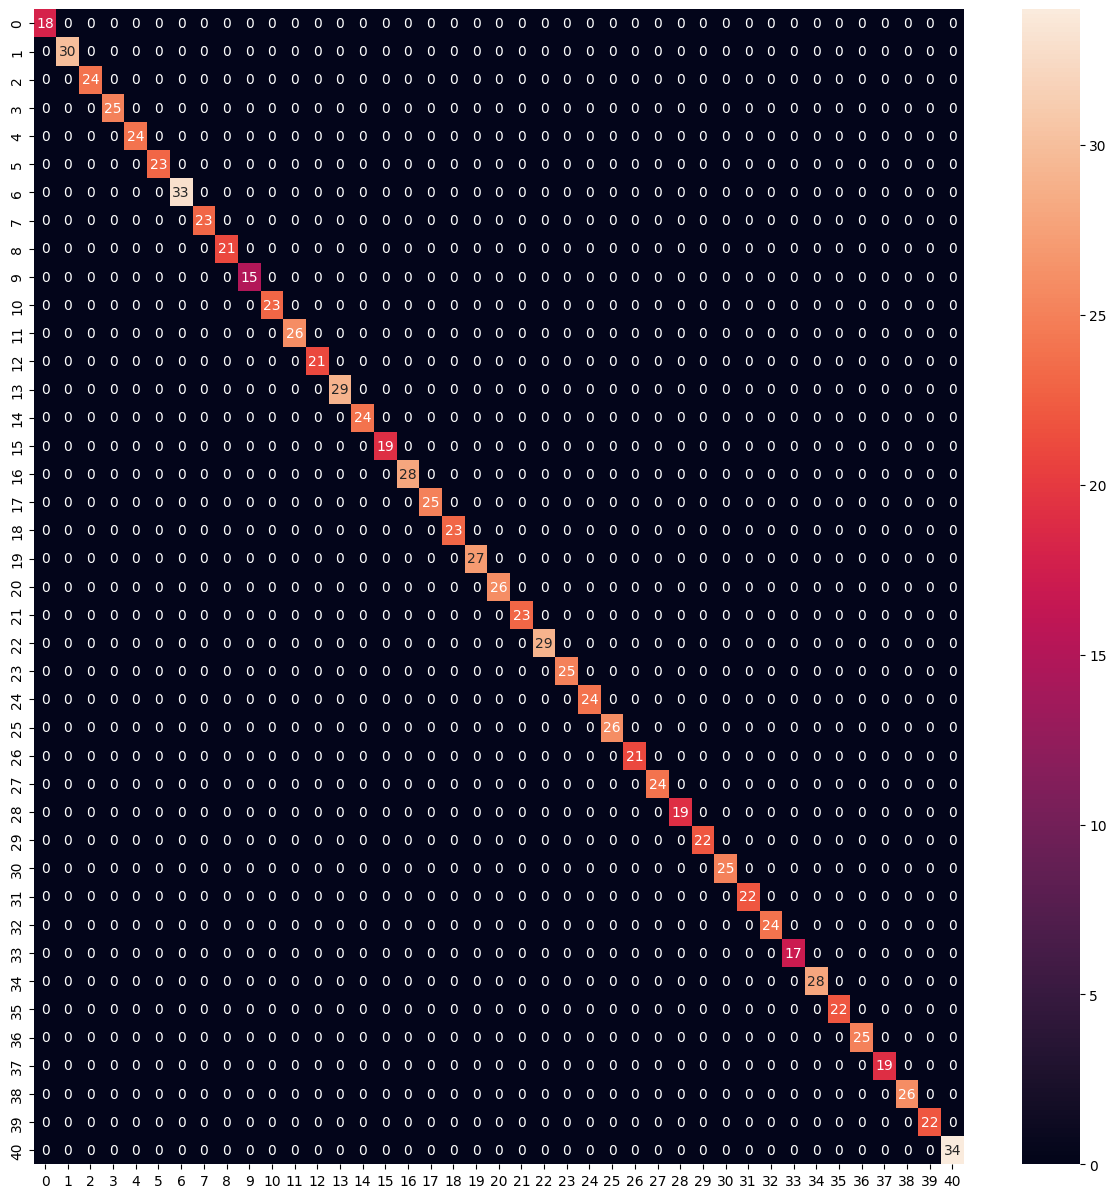



=============::classification report for Gradiant_Boosting::============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
      

In [42]:
gb = training_model('Gradiant_Boosting', models['Gradiant_Boosting'])

============::training MultiNomialNB model::==========
MultiNomialNB accuracy :1.0

=============::confusion matrix for MultiNomialNB::============


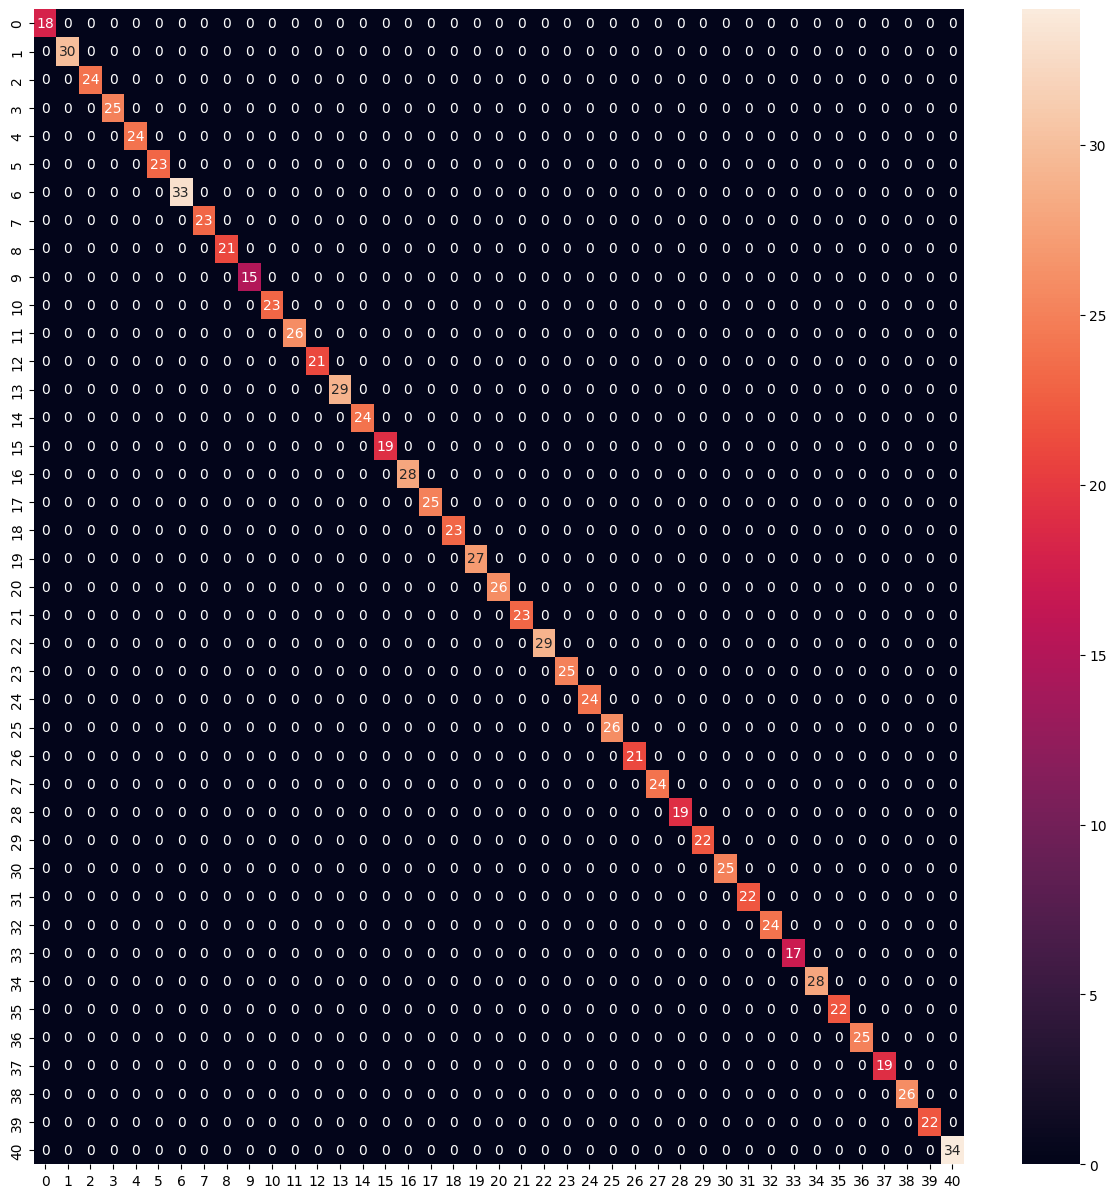



=============::classification report for MultiNomialNB::============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          

In [43]:
mnb = training_model('MultiNomialNB', models['MultiNomialNB'])

============::training Kneighbours model::==========
Kneighbours accuracy :1.0

=============::confusion matrix for Kneighbours::============


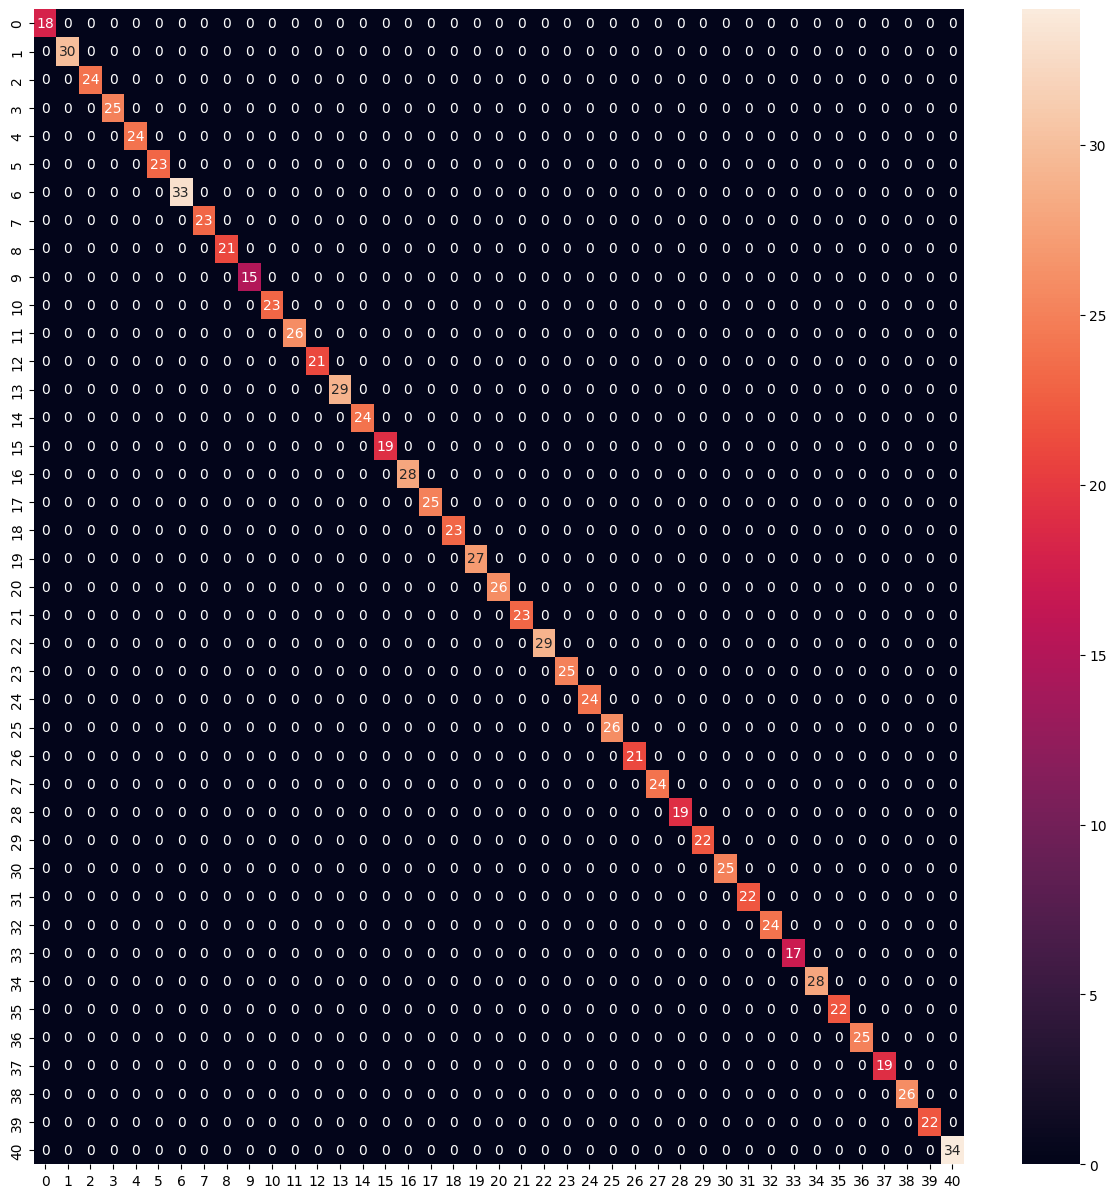



=============::classification report for Kneighbours::============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16

In [44]:
knn = training_model('Kneighbours', models['Kneighbours'])

## Ensembeling

In [45]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [46]:
def load_model(name):
    return pkl.load(open(f'/content/drive/MyDrive/medical-diagnosis/models/{name}.pkl','rb'))

In [48]:
estimators = [
    ('svm', load_model("svm")),
    ('rf', load_model("rf")),
    ('gb', load_model("gb")),
    ('mnb', load_model("mnb")),
    ('knn', load_model("knn"))
]

EOFError: Ran out of input

In [ ]:
voting_clf = VotingClassifier(estimators=estimators)

In [ ]:
training_model('voting_clf', voting_clf)

## Testing

In [ ]:
X_test.iloc[1].values.reshape(1,-1) # test 1


In [ ]:
rf.predict([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]])   # test from Rf

In [ ]:
rf.predict([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
X_test.iloc[7].values.reshape(1,-1)  # test 2

In [ ]:
rf.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
y_test

MAke Recommendation And Predetion

In [ ]:
#load few data set

precaution = pd.read_csv("/content/drive/MyDrive/medical-diagnosis/data/precautions_df.csv")
workout = pd.read_csv("/content/drive/MyDrive/medical-diagnosis/data/workout_df.csv")
medication = pd.read_csv('/content/drive/MyDrive/medical-diagnosis/data/medications.csv')
diets = pd.read_csv('/content/drive/MyDrive/medical-diagnosis/data/diets.csv')
description = pd.read_csv("/content/drive/MyDrive/medical-diagnosis/data/description.csv")


In [ ]:
import json

def write_json(my_dict, filename):
    with open(filename, 'w') as json_file:
        json.dump(my_dict, json_file)


In [ ]:
# Reading from a file
def read_file(filename):
    with open(filename, 'r') as json_file:
        loaded_dict = json.load(json_file)
        return loaded_dict


In [ ]:
#healper Function

def helper(dis):
    descr = description[description['Disease'] == dis ]['Description']
    descr = " ".join({ w for w in descr})

    pre = precaution[precaution['Disease'] == dis ][['Precaution_1',
    	'Precaution_2',	'Precaution_3'	,'Precaution_4']]
    pre  = [col for col in pre.values]


    die = diets[diets['Disease']== dis ]['Diet']
    die = [die for die in die.values]
    work = workout[workout['disease']== dis ]['workout']

    med = medication[medication['Disease'] == dis ]['Medication']
    med = [med for med in med.values]

    return descr , pre , die , med, work





symptom_dict = {
    'itching': 0,
    'skin_rash': 1,
    'nodal_skin_eruptions': 2,
    'continuous_sneezing': 3,
    'shivering': 4,
    'chills': 5,
    'joint_pain': 6,
    'stomach_pain': 7,
    'acidity': 8,
    'ulcers_on_tongue': 9,
    'muscle_wasting': 10,
    'vomiting': 11,
    'burning_micturition': 12,
    'spotting_ urination': 13,
    'fatigue': 14,
    'weight_gain': 15,
    'anxiety': 16,
    'cold_hands_and_feets': 17,
    'mood_swings': 18,
    'weight_loss': 19,
    'restlessness': 20,
    'lethargy': 21,
    'patches_in_throat': 22,
    'irregular_sugar_level': 23,
    'cough': 24,
    'high_fever': 25,
    'sunken_eyes': 26,
    'breathlessness': 27,
    'sweating': 28,
    'dehydration': 29,
    'indigestion': 30,
    'headache': 31,
    'yellowish_skin': 32,
    'dark_urine': 33,
    'nausea': 34,
    'loss_of_appetite': 35,
    'pain_behind_the_eyes': 36,
    'back_pain': 37,
    'constipation': 38,
    'abdominal_pain': 39,
    'diarrhoea': 40,
    'mild_fever': 41,
    'yellow_urine': 42,
    'yellowing_of_eyes': 43,
    'acute_liver_failure': 44,
    'fluid_overload': 45,
    'swelling_of_stomach': 46,
    'swelled_lymph_nodes': 47,
    'malaise': 48,
    'blurred_and_distorted_vision': 49,
    'phlegm': 50,
    'throat_irritation': 51,
    'redness_of_eyes': 52,
    'sinus_pressure': 53,
    'runny_nose': 54,
    'congestion': 55,
    'chest_pain': 56,
    'weakness_in_limbs': 57,
    'fast_heart_rate': 58,
    'pain_during_bowel_movements': 59,
    'pain_in_anal_region': 60,
    'bloody_stool': 61,
    'irritation_in_anus': 62,
    'neck_pain': 63,
    'dizziness': 64,
    'cramps': 65,
    'bruising': 66,
    'obesity': 67,
    'swollen_legs': 68,
    'swollen_blood_vessels': 69,
    'puffy_face_and_eyes': 70,
    'enlarged_thyroid': 71,
    'brittle_nails': 72,
    'swollen_extremeties': 73,
    'excessive_hunger': 74,
    'extra_marital_contacts': 75,
    'drying_and_tingling_lips': 76,
    'slurred_speech': 77,
    'knee_pain': 78,
    'hip_joint_pain': 79,
    'muscle_weakness': 80,
    'stiff_neck': 81,
    'swelling_joints': 82,
    'movement_stiffness': 83,
    'spinning_movements': 84,
    'loss_of_balance': 85,
    'unsteadiness': 86,
    'weakness_of_one_body_side': 87,
    'loss_of_smell': 88,
    'bladder_discomfort': 89,
    'foul_smell_of urine': 90,
    'continuous_feel_of_urine': 91,
    'passage_of_gases': 92,
    'internal_itching': 93,
    'toxic_look_(typhos)': 94,
    'depression': 95,
    'irritability': 96,
    'muscle_pain': 97,
    'altered_sensorium': 98,
    'red_spots_over_body': 99,
    'belly_pain': 100,
    'abnormal_menstruation': 101,
    'dischromic _patches': 102,
    'watering_from_eyes': 103,
    'increased_appetite': 104,
    'polyuria': 105,
    'family_history': 106,
    'mucoid_sputum': 107,
    'rusty_sputum': 108,
    'lack_of_concentration': 109,
    'visual_disturbances': 110,
    'receiving_blood_transfusion': 111,
    'receiving_unsterile_injections': 112,
    'coma': 113,
    'stomach_bleeding': 114,
    'distention_of_abdomen': 115,
    'history_of_alcohol_consumption': 116,
    'fluid_overload.1': 117,
    'blood_in_sputum': 118,
    'prominent_veins_on_calf': 119,
    'palpitations': 120,
    'painful_walking': 121,
    'pus_filled_pimples': 122,
    'blackheads': 123,
    'scurring': 124,
    'skin_peeling': 125,
    'silver_like_dusting': 126,
    'small_dents_in_nails': 127,
    'inflammatory_nails': 128,
    'blister': 129,
    'red_sore_around_nose': 130,
    'yellow_crust_ooze': 131
}

diseases_list = {
    15: 'Fungal infection',
    20: 'Hepatitis C',
    22: 'Hepatitis E',
    3: 'Alcoholic hepatitis',
    36: 'Tuberculosis',
    10: 'Common Cold',
    34: 'Pneumonia',
    13: 'Dimorphic hemmorhoids(piles)',
    18: 'Heart attack',
    39: 'Varicose veins',
    26: 'Hypothyroidism',
    24: 'Hyperthyroidism',
    25: 'Hypoglycemia',
    31: 'Osteoarthristis',
    5: 'Arthritis',
    0: '(vertigo) Paroymsal  Positional Vertigo',
    2: 'Acne',
    38: 'Urinary tract infection',
    35: 'Psoriasis',
    21: 'Hepatitis D',
    19: 'Hepatitis B',
    4: 'Allergy',
    40: 'hepatitis A',
    16: 'GERD',
    9: 'Chronic cholestasis',
    14: 'Drug Reaction',
    33: 'Peptic ulcer diseae',
    1: 'AIDS',
    12: 'Diabetes',
    17: 'Gastroenteritis',
    6: 'Bronchial Asthma',
    23: 'Hypertension',
    30: 'Migraine',
    7: 'Cervical spondylosis',
    32: 'Paralysis (brain hemorrhage)',
    28: 'Jaundice',
    29: 'Malaria',
    8: 'Chicken pox',
    11: 'Dengue',
    37: 'Typhoid',
    27: 'Impetigo'
}

#model prediction

def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptom_dict))
    for item in patient_symptoms:
        input_vector[symptom_dict[item]] = 1

    print(input_vector)
    return diseases_list[rf.predict([input_vector])[0]]

In [ ]:
write_json(symptom_dict, '/content/drive/MyDrive/medical-diagnosis/data/symptom_dict.json')
write_json(diseases_list, '/content/drive/MyDrive/medical-diagnosis/data/diseases_list.json')

In [ ]:
symptoms = input('Enter Your Symptoms Here..')
user_symptoms = [ s.strip() for s in symptoms.split(',')]
user_symptoms = [ sym.strip("[]'") for sym in user_symptoms]

predicted_disease = get_predicted_value(user_symptoms)
descr , pre , die , med, work = helper(predicted_disease)

#Result Time
print('********************************Predicted Disease ************************************')
print(" Machine Prediction is:-", predicted_disease )
print('********************************Predicted Description ************************************')
print(descr)
print('********************************Predicted Precaution ************************************')
i = 1
for j in pre[0]:
    print(i , ':' , j)
    i += 1
print('********************************Predicted Diets ************************************')
for i in die:

    print(i)

print('********************************Predicted Medication ************************************')
i = 1
for j in med:
    print(i, ":", j)
    i+= 1
print('********************************Predicted workout ************************************')
i = 1
for j in med:
    print(i, ":", j)
    i+= 1
#

In [ ]:
 predicted_disease
